In [9]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib import rc

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import sys
import math
import pickle

import itertools

In [10]:

#FUNCTION
def partition_N(n):
    '''do the partition of a complete graph'''
    indexs = range(n)
    pairs_all = []

    swap_even = [i + pow(-1, i) for i in range(n)]

    swap_odd = [0]
    swap_odd.extend([i + pow(-1, i+1) for i in range(1,n-1)])
    swap_odd.append(n-1)

    pairs_even = [(i, i+1) for i in range(0, n, 2)]
    indexs = np.array(indexs)[swap_even]   ### indexs after swap even
    #     print('\nindexs after swap {}: {}'.format(0, indexs))
    pairs_all.append(pairs_even)
    for i in range(1, n):
        if (i%2)==1:
            pair_odd = [(indexs[i], indexs[i+1]) for i in range(1, n-1, 2)]
            pairs_all.append(pair_odd)
            indexs = np.array(indexs)[swap_odd]   ### indexs after swap even
    #             print('\nindexs after swap {}: {}'.format(i, indexs))

        elif (i%2)==0:
            pair_even = [(indexs[i], indexs[i+1]) for i in range(0, n-1, 2)]
            pairs_all.append(pair_even)
            indexs = np.array(indexs)[swap_even]   ### indexs after swap even
    #             print('\nindexs after swap {}: {}'.format(i, indexs))

    return pairs_all


tau =  1 alpha =  0.01
sr_array =  [[1.]
 [1.]
 [1.]]
ar_array =  [1.]


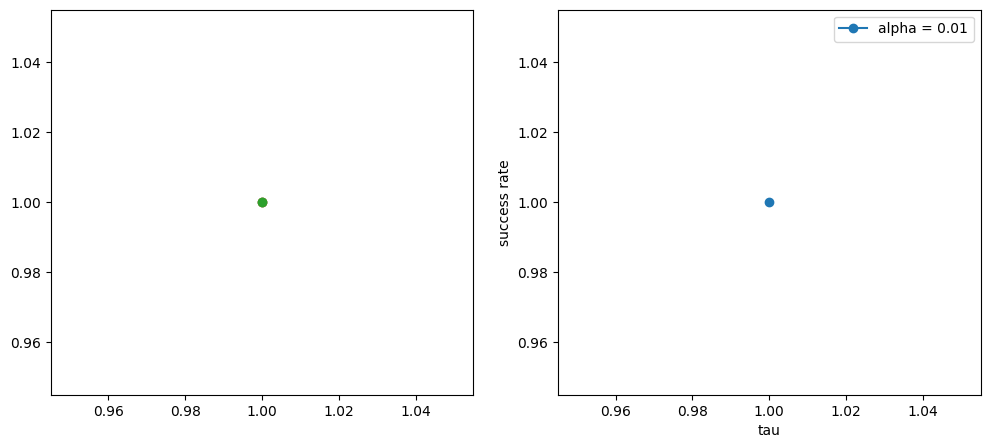

In [11]:
N=6
r_list = range(1)
tau_list = [1]
alpha_list = [0.01]


num_variables = str(N).zfill(3)

ansatz_type = 'structure_like_qubo_YZ_2' 

layer = 1

shots = None

alpha = 0.01

initialization = 'warm_start_measure' 

pairs_all = list(itertools.chain.from_iterable(partition_N(N)))
num_pairs = len(pairs_all)
num_params = (N + 2*num_pairs) * layer


num_opt_list = [1,2,3]
color_list = ["green", "blue", "red"]
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

dir_0 = './data_iter' + '/ansatz_type_{}/shots_{}'\
                        .format(ansatz_type,  shots)

for alpha in alpha_list:
    sr_array = np.zeros((len(num_opt_list), len(tau_list)))
    ar_array = np.zeros(len(tau_list))
    for taui, tau in enumerate(tau_list):
        print("\ntau = ", tau, "alpha = ", alpha)

        dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}/initial_{}'\
                            .format(num_variables, num_params, layer, alpha, initialization)
        
        for r in r_list:

            file_dir_name = dir_name + '/r_{}'\
                            .format(r)
            filename = file_dir_name + '/tau_{}_random.pkl'\
                                                    .format(tau)

            with open(filename, 'rb') as f:
                data = pickle.load(f)
            params_list = data["params_list"]
            if len(params_list) != round(N**2):
                print("error N, r = ", r, len(params_list))
            steps_exp_poss_dict = data["steps_exp_poss_dict"]
            steps_cvar_dict = data["steps_cvar_dict"]
            
            final_exp_poss = steps_exp_poss_dict["step_5"]["l_1"]
            poss_list = list(final_exp_poss.values())
            if poss_list[0] > alpha:
                sr_array[0, taui] += 1/len(r_list)
            if sum(poss_list[:2]) > alpha:
                sr_array[1, taui] += 1/len(r_list)
            if sum(poss_list[:3]) > alpha:
                sr_array[2, taui] += 1/len(r_list)

            exp_opt = list(final_exp_poss.keys())[0]
            cvar = steps_cvar_dict["step_9"]
            ar_array[taui] += (cvar/exp_opt) / len(r_list)

    print("sr_array = ", sr_array)
    ax1.plot(tau_list, sr_array[0], "o-", label=f"alpha = {alpha}, num_opt = 1")
    ax1.plot(tau_list, sr_array[1], "o--",label=f"alpha = {alpha}, num_opt = 2")
    ax1.plot(tau_list, sr_array[2], "o:",label=f"alpha = {alpha}, num_opt = 3")

    ax2.plot(tau_list, ar_array, "o-", label=f"alpha = {alpha}")
    print("ar_array = ", ar_array)
plt.legend()
plt.xlabel("tau")
plt.ylabel("success rate")
plt.show()